<a href="https://colab.research.google.com/github/rushi2012/DNN_Project/blob/main/DNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

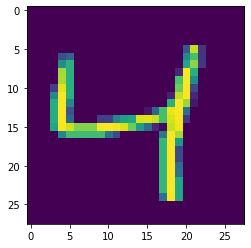

In [ ]:
plt.imshow(trainsetX[2])
plt.show

In [ ]:
print(trainsety[2])

4


In [ ]:
print(trainsetX[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [ ]:
imagesize = 20
xtrain = np.array(trainsetX).reshape(-1, imagesize, imagesize, 1)
xtest = np.array(testsetX).reshape(-1, imagesize, imagesize, 1)

In [ ]:
xtrain.shape

(117600, 20, 20, 1)

In [ ]:
xtest.shape

(19600, 20, 20, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Convolution2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Convolution2D(64, (3,3), input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 64)        640       
                                                                 
 activation (Activation)     (None, 18, 18, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 64)                331840    
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
model = Sequential()
model.add(Convolution2D(64, (3,3), input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 18, 18, 64)        640       
                                                                 
 activation_8 (Activation)   (None, 18, 18, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5184)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                51850     
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                      